# Imersão Alura

###  [IMDB Data Set Link](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows)

This is a dataset with top 1000 films of all times accordingly to IMDB rank score. It has these following data heads: 

* Poster_Link - Link of the poster that imdb using
* Series_Title = Name of the movie
* Released_Year - Year at which that movie released
* Certificate - Certificate earned by that movie
* Runtime - Total runtime of the movie
* Genre - Genre of the movie
* IMDB_Rating - Rating of the movie at IMDB site
* Overview - mini story/ summary
* Meta_score - Score earned by the movie
* Director - Name of the Director
* Star1,Star2,Star3,Star4 - Name of the Stars
* No_of_votes - Total number of votes
* Gross - Money earned by that movie

## Loading Data from your Google Sheets:

It's important to handle some issues around connecting Google Cloud Services.So you should follow some steps after allocated your dataset on your Google Drive Account.

#### Follow these steps: 

Google Cloud Console Setup:

Go to the Google Cloud Console.

* Create your new project. 
* Navigate to the Library.
* Search for and enable both the Google Sheets API and the Google Drive API.

Service Account Creation:

* In the Google Cloud Console, navigate to IAM & Admin > Service accounts.
* Click Create Service Account.
* Give it a name and description.
* Click Create.
* Assign the role of Editor (or a more restrictive role if you prefer, but for testing, Editor will ensure it has all necessary permissions).
* Click Continue and then Done.

Download Credentials:

* In the list of service accounts, click on the one you just created.
* Under the Keys tab, click Add Key and choose JSON.
* This will download a JSON file. Keep this file safe and DO NOT share it. This file will be used in your Python script to authenticate.

Share Sheet with Service Account:

* Open the JSON file you downloaded. >>> you can open with notebook app (txt format)
* Find the "client_email" field. Copy the email address (it will look something like your-service-account-name@your-project-id.iam.gserviceaccount.com).
* Go to your Google Sheet.
* Click the Share button and paste the service account email. Give it Editor permissions.

In [3]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

#scope of what you will operate within google services. It seems like a HTTP scope address. 

scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive.file", "https://www.googleapis.com/auth/drive"]

#Here goes the JSON file you've downloaded. 
creds = ServiceAccountCredentials.from_json_keyfile_name(r"C:\Users\Gabriel Ribeiro\Downloads\aluraimersao-4d8b93d21751.json", scope)

try:
    client = gspread.authorize(creds)
    ws = client.open_by_url("https://docs.google.com/spreadsheets/d/1fmpkkn5fLB9R0GBAGcqT6lTxEtmhlkrmXSujSID6BbE/edit#gid=1411677682")
    
except gspread.exceptions.GSpreadException as e:
    print(f"An error occurred with gspread: {e}")
    
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [4]:
#opening your data spreadsheet and allocating all data on a variable so we can operate with a Pandas DataFrame
client = gspread.authorize(creds)
spreadsheet = client.open_by_url("https://docs.google.com/spreadsheets/d/1fmpkkn5fLB9R0GBAGcqT6lTxEtmhlkrmXSujSID6BbE/edit#gid=1411677682")

ws = spreadsheet.get_worksheet(0)

data = ws.get_all_records()

In [39]:
import pandas as pd
import matplotlib as mtpl

df = pd.DataFrame(data)

#understanding firsts rows from our dataset
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


## Investigating and Cleaning Data

Here it's important to know how is it your data and investigate a little to see some incongruencies or even distortions. It's important to know data context so you can work around it.

In [40]:
#checking data types
print(df.dtypes)

#enumerate how many null rows there are
print(df.isnull().sum())

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score        object
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [64]:
'''
As we can see, many collumns are objects, probably because they're in a format that haven't be matched with any other or there're more than on variables inside a cell. 

From a cleaner data perspective we need to walk through those more logical collumns and work with them
'''

#Investigating Gross

uniques = df['Gross'].apply(type).unique()
print(uniques)


[<class 'int'> <class 'str'>]


In [65]:
# There're integer and strings values insides those collumns cells. 
# Therefore, we're converting all of them to float64 numbers as they're should be cause it's a gross representation

df['Gross'] = df['Gross'].astype(str)
df['Gross'] = df['Gross'].str.replace('[^\d.]', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce').fillna(0)

print(df['Gross'])

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
995            0.0
996            0.0
997     30500000.0
998            0.0
999            0.0
Name: Gross, Length: 1000, dtype: float64


In [12]:
#Investigating types Released Year; Meta_Score; Runtime; 

#df['Released_Year']
#df['Meta_score']
uniqueruns = df['Runtime'].unique()
print(uniqueruns)

[142 175 152 202  96 201 154 195 148 139 178 161 179 136 146 124 133 160
 132 153 169 130 125 189 116 127 118 121 207 122 106 112 151 150 155 119
 110  88 137  89 165 109 102  87 126 147 117 181 149 105 164 170  98 101
 113 134 229 115 143  95 104 123 131 108  81  99 114 129 228 128 103 107
  68 138 156 167 163 186 321 135 140 180 158 210  86 162 177 204  91 172
  45 145 100 196  93 120  92 144  80 183 111 141 224 171 188  94 185  85
 205 212 238  72  67  76 159  83  90  84 191 197 174  97  75 157 209  82
 220  64 184 168 166 192 194 193  69  70 242  79  71  78]


In [15]:
def clean_numeric_column(column_name):
    try:
        # Attempt to clean using regex
        df[column_name] = df[column_name].replace('[^\d]', np.nan, regex=True)
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
        df[column_name] = df[column_name].fillna(0).astype(int)
        print(f"{column_name} used first method")
    except:
        # If regex fails, try the split method
        try:
            df[column_name] = df[column_name].str.split().str[0].astype(int)
            df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
            df[column_name] = df[column_name].fillna(0)
            print(f"{column_name} used second method")
        except:
            print(f"Failed to clean column {column_name}. Check its format.")
    return df[column_name]

# Test the function
columns_to_clean = ['Released_Year', 'Meta_score']
for col in columns_to_clean:
    clean_numeric_column(col)

Released_Year used first method
Meta_score used first method


In [63]:
#Here you need to check if those cells that couldn't convert. We'll treat separately those cases. 

import numpy as np

df['Meta_score'] = df['Meta_score'].astype(str)
df['Meta_score'] = df['Meta_score'].replace(['[^\d]', ''], np.nan, regex=True)
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
df['Meta_score'] = df['Meta_score'].fillna(0).astype(int)

unique = df['Meta_score'].unique()
print(unique)


[ 80 100  84  90  96  94  74  66  92  82  87  73  83   0  79  91  61  59
  65  85  98  89  88  57  67  62  77  64  75  97  99  78  68  81  95  76
  69  55  70  58  86  71  63  93  72  60  47  49  50  33  54  56  51  53
  48  44  45  40  52  28  36  46  30  41]


In [38]:
#Now those columns are correct. Let's see how our DataFrame is

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int32  
 3   Certificate    999 non-null    object 
 4   Runtime        1000 non-null   int32  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   int32  
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(2), int32(3), int64(1), object(10)
memory usage: 113.4+ KB


In [17]:
#Ok, now let's focus on search some outliers and some analytics preliminares. We're not working on those object columns yet

# Descriptive Statistics for numerical columns

df[['Gross', 'Meta_score', 'IMDB_Rating', 'Runtime', 'Released_Year', 'No_of_Votes']].describe()

,Gross,Meta_score,IMDB_Rating,Runtime,Released_Year,No_of_Votes
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,5.653688e+07,65.730000,7.949300,122.891000,1989.226000,2.736929e+05
std,1.032382e+08,30.570208,0.275491,28.093671,67.135341,3.273727e+05
min,0.000000e+00,0.000000,7.600000,45.000000,0.000000,2.508800e+04
25%,4.457098e+05,63.000000,7.700000,103.000000,1976.000000,5.552625e+04
50%,1.070275e+07,76.000000,7.900000,119.000000,1999.000000,1.385485e+05
75%,6.153989e+07,85.250000,8.100000,137.000000,2009.000000,3.741612e+05
max,9.366622e+08,100.000000,9.300000,321.000000,2020.000000,2.343110e+06


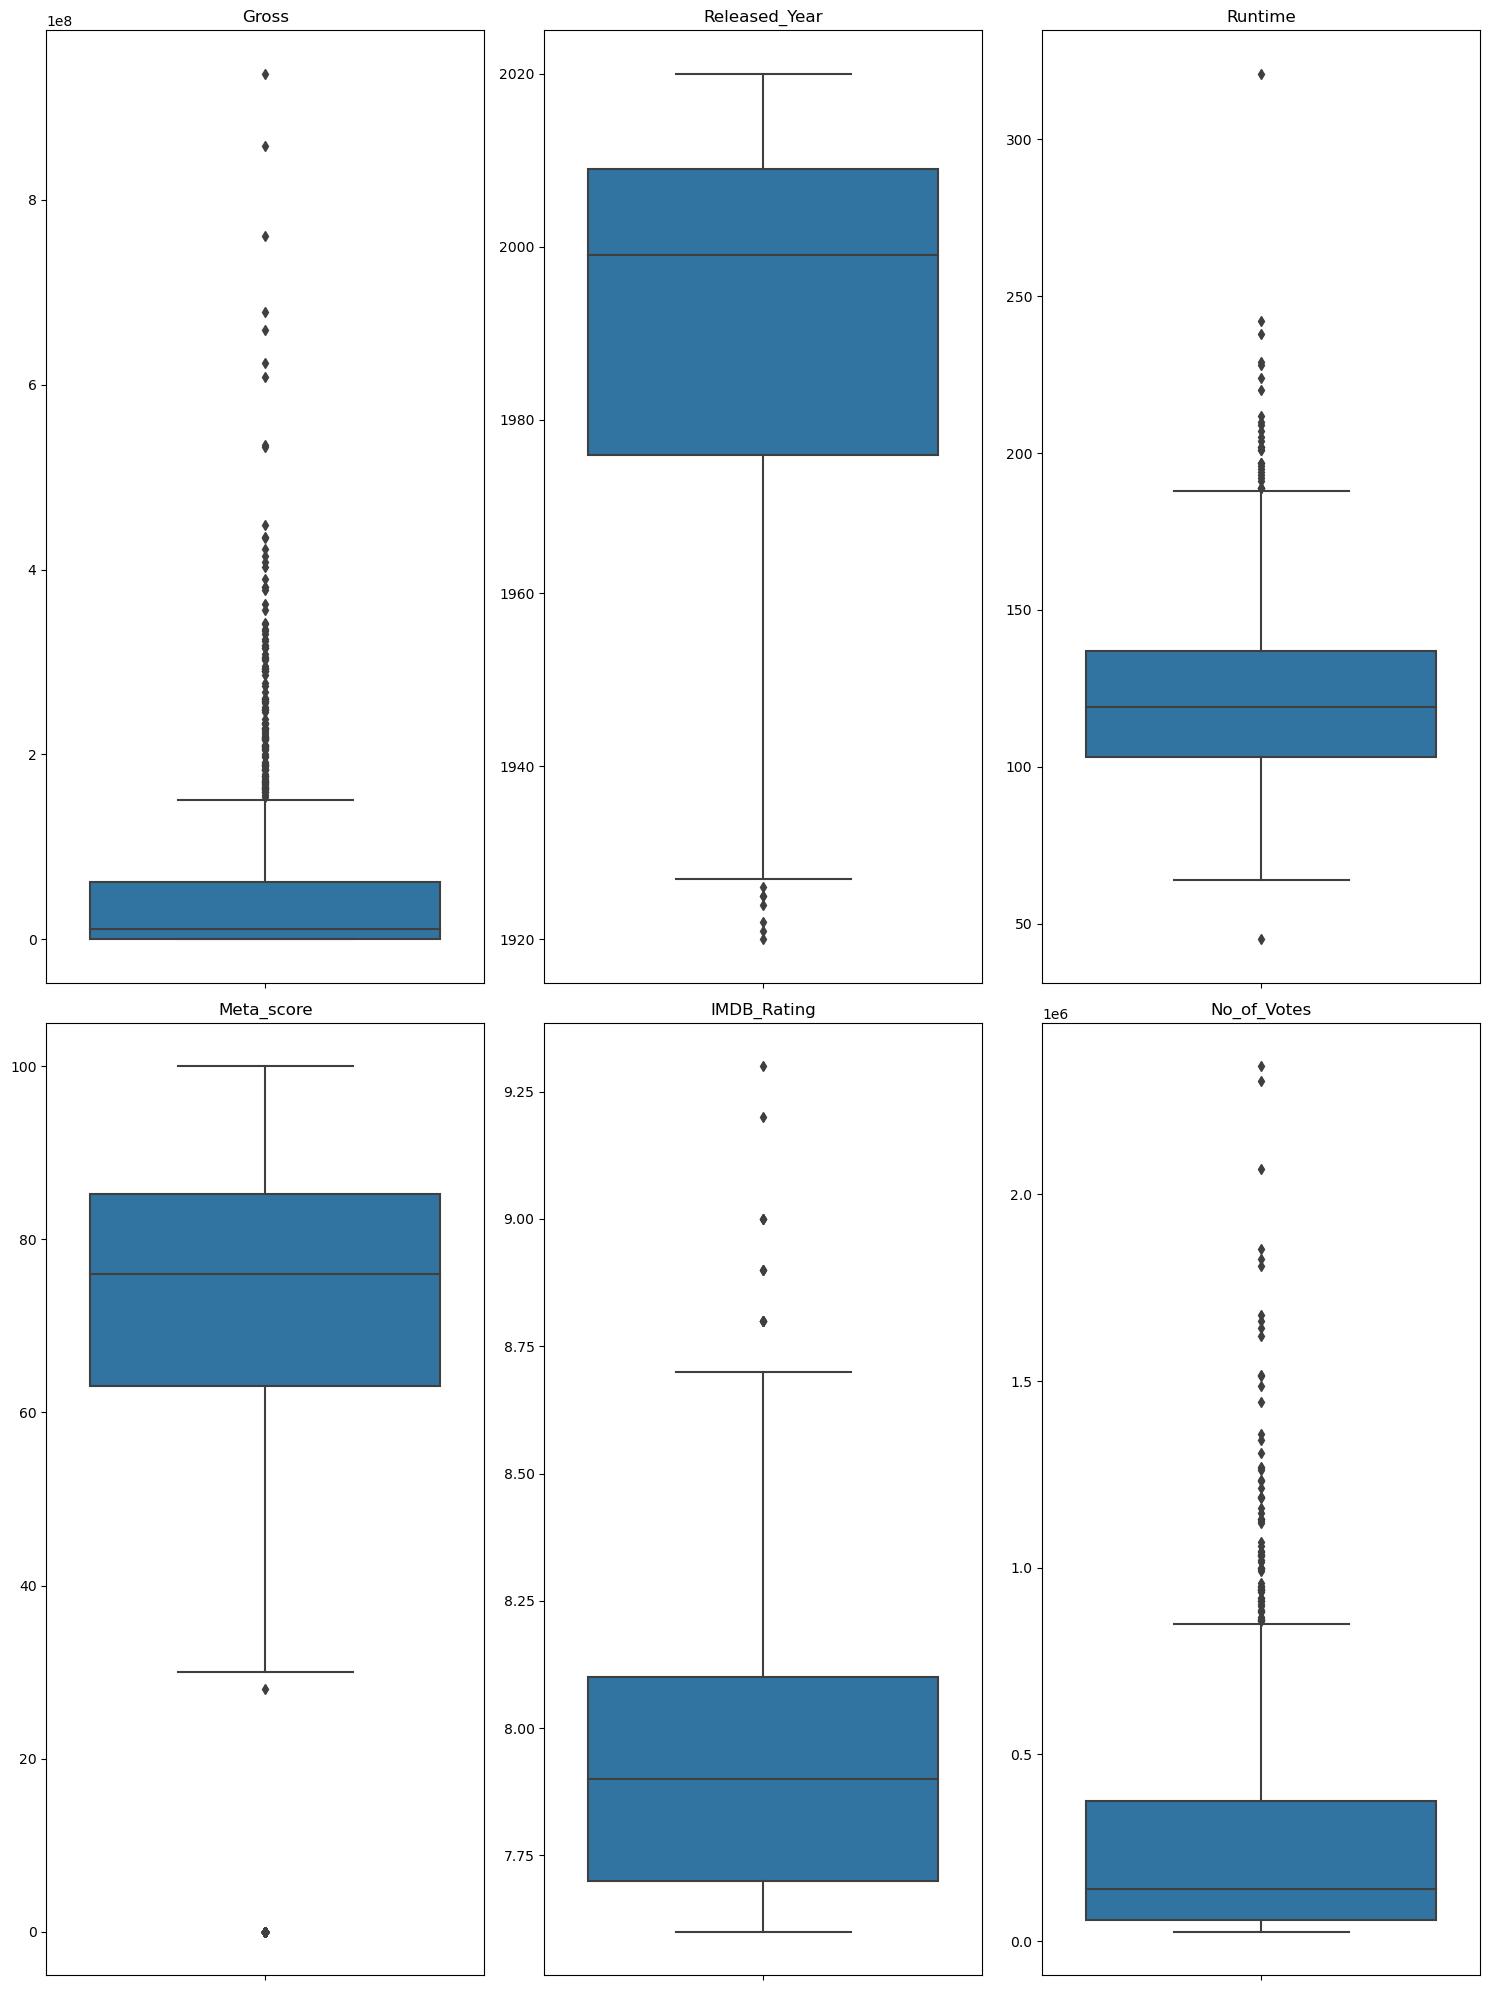

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['Gross', 'Released_Year', 'Runtime', 'Meta_score', 'IMDB_Rating', 'No_of_Votes']

# Plotting boxplots for each numerical column
plt.figure(figsize=(15,20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [19]:
#As you can see, we still have a problema with Relased Year. 
#That typo or missinformation must be corrected so we can work around
df.at[966, 'Released_Year'] = 1995
yearzero = df[df['Series_Title'] == 'Apollo 13']

yearzero
#after searching for a correc date, we've encoutered 1995 as a relased year
#Switch those values

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,1995,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


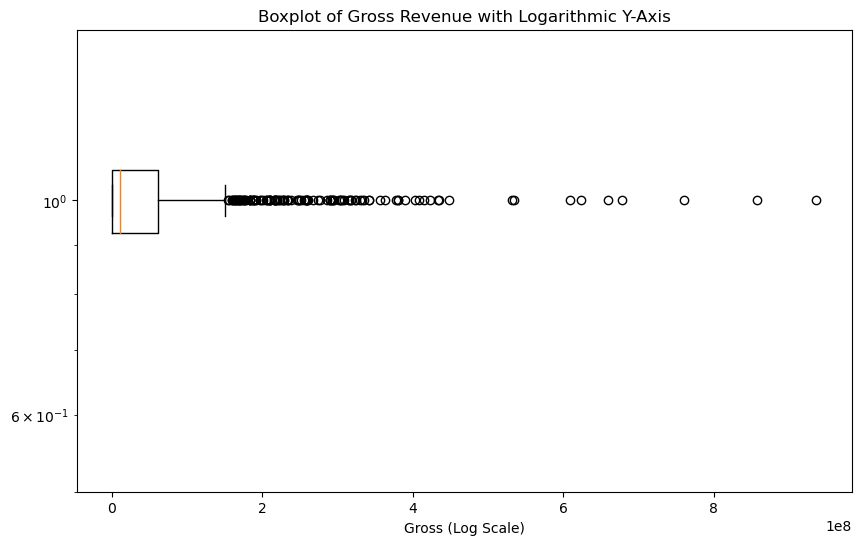

In [87]:
#Those gross has so many outliers that we need to put on another perspective

# Extracting the 'Gross' column data
gross_data = df['Gross'].dropna()

# Plotting the boxplot with a log y-axis
plt.figure(figsize=(10, 6))
plt.boxplot(gross_data, vert=False)
plt.yscale('log')
plt.xlabel('Gross (Log Scale)')
plt.title('Boxplot of Gross Revenue with Logarithmic Y-Axis')
plt.show()


In [55]:
#Checking Genre, Director and Certificate frequency


def get_frequency_distribution(data, columns):
    """
    Returns the frequency distribution for the specified columns in the data.
    
    Parameters:
    - data: DataFrame containing the data
    - columns: List of column names for which the frequency distribution is required
    
    Returns:
    - Dictionary with column names as keys and their frequency distribution as values
    """
    frequency_dict = {}
    for column in columns:
        frequency_dict[column] = data[column].value_counts()
    return frequency_dict

# Getting the frequency distribution for 'Genre', 'Certificate', and 'Director'
frequency_distributions = get_frequency_distribution(df, ['Genre', 'Certificate', 'Director'])

#frequency_distributions
frequency_distributions

{'Genre': Drama                        85
 Drama, Romance               37
 Comedy, Drama                35
 Comedy, Drama, Romance       31
 Action, Crime, Drama         30
                              ..
 Adventure, Thriller           1
 Animation, Action, Sci-Fi     1
 Action, Crime, Comedy         1
 Animation, Crime, Mystery     1
 Adventure, Comedy, War        1
 Name: Genre, Length: 202, dtype: int64,
 'Certificate': U           234
 A           197
 UA          175
 R           146
             101
 PG-13        43
 PG           37
 Passed       34
 G            12
 Approved     11
 TV-PG         3
 GP            2
 TV-14         1
 16            1
 TV-MA         1
 Unrated       1
 U/A           1
 Name: Certificate, dtype: int64,
 'Director': Alfred Hitchcock    14
 Steven Spielberg    13
 Hayao Miyazaki      11
 Martin Scorsese     10
 Akira Kurosawa      10
                     ..
 Neill Blomkamp       1
 Tomas Alfredson      1
 Duncan Jones         1
 Jacques Audiard     

In [59]:
#Certificate has some typos, so I've changed some os the rolls after searching those movies on IMDB website

df['Certificate'] = df['Certificate'].replace('', 'Not Rated')
df['Certificate'] = df['Certificate'].replace(16, 'PG-16')
df['Certificate'] = df['Certificate'].replace('Unrated', 'Not Rated')
df['Certificate'] = df['Certificate'].replace('U/A', 'UA')

df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'Not Rated', 'PG', 'G', 'Passed',
       'TV-14', 'PG-16', 'TV-MA', 'GP', 'Approved', 'TV-PG'], dtype=object)

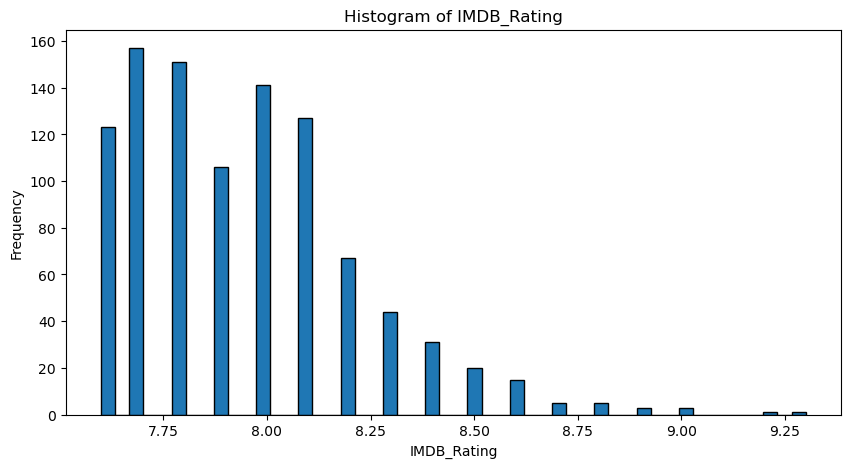

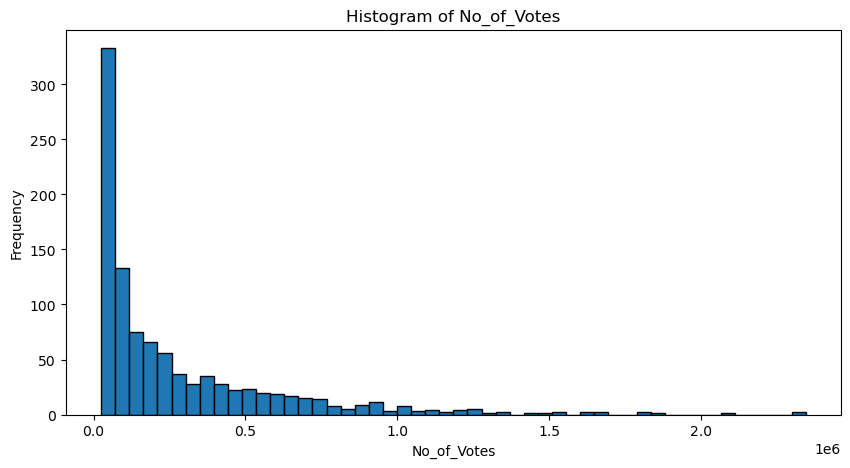

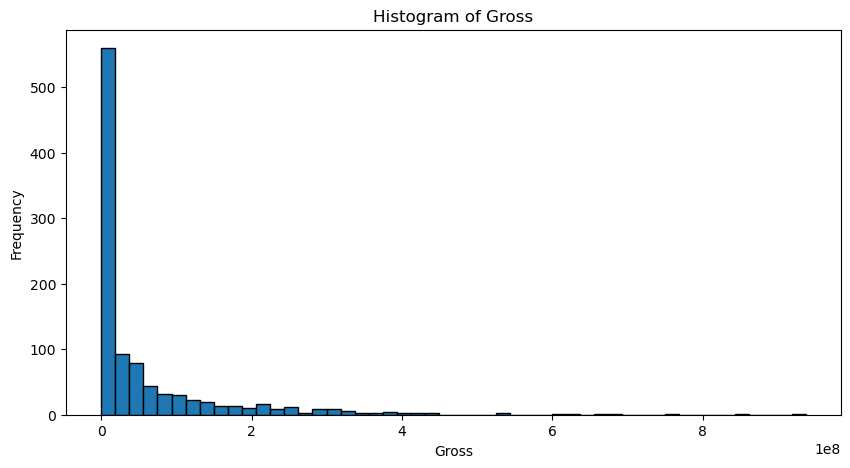

In [67]:
#Seeing some data from another pespective


# List of columns to plot
columns_to_plot = ['IMDB_Rating', 'No_of_Votes','Gross']

# Plotting histograms
for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    df[col].hist(bins=50, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

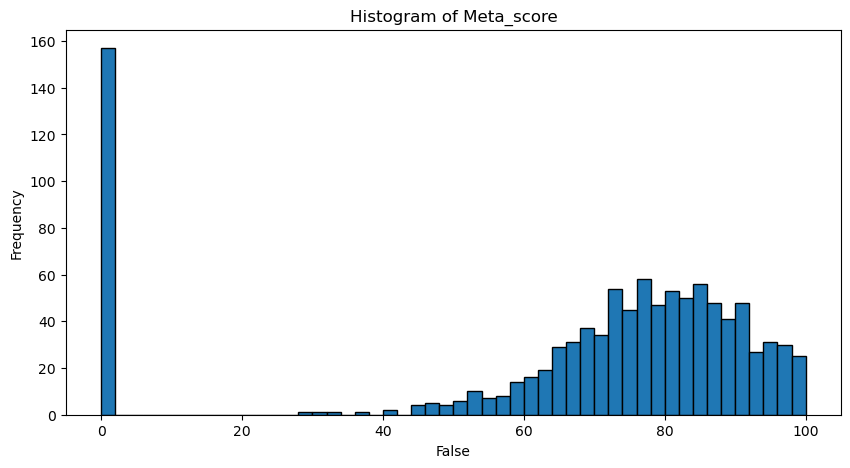

In [70]:
# Isolating Meta_score (too much widht)

# Plotting histograms
plt.figure(figsize=(10, 5))
df['Meta_score'].hist(bins=50, edgecolor='black')
plt.title(f'Histogram of Meta_score')
plt.xlabel(df['Meta_score'].all())
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

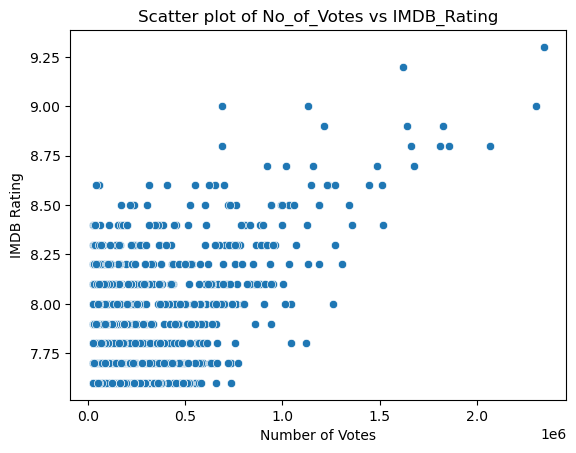

In [89]:
#Since there're a lot of films that has no Meta_score, we're not working with that metric. 
#Later I'll see if I can correct those. We'll start out some correlations: 

#No_of_Votes & IMDB_Rating
sns.scatterplot(x='No_of_Votes', y='IMDB_Rating', data=df)

plt.title('Scatter plot of No_of_Votes vs IMDB_Rating')
plt.xlabel('Number of Votes')
plt.ylabel('IMDB Rating')
plt.show()

In [90]:
#A numerical version of this would be a corr() - Pearson correlation

correlation = df[['No_of_Votes', 'IMDB_Rating']].corr().iloc[0, 1]
print(f"Correlation between No_of_Votes and IMDB_Rating: {correlation:.2f}")

Correlation between No_of_Votes and IMDB_Rating: 0.49


In [94]:
'''
0.49 correlation mean that those 2 variables has a moderate correlation. 
Therefore, maybe films that has more votes got a higher rating
But, if you loc closly, you'll see that most of films dind't have a larger number os votes. Let's see those strong correlated
films and see why those are so damn strong related
'''


# Standardize the variables (z-scores)
df['z_votes'] = (df['No_of_Votes'] - df['No_of_Votes'].mean()) / df['No_of_Votes'].std()
df['z_rating'] = (df['IMDB_Rating'] - df['IMDB_Rating'].mean()) / df['IMDB_Rating'].std()

# Calculate the product of the z-scores
df['influence'] = df['z_votes'] * df['z_rating']

# Sort by influence
influential_films = df.sort_values(by='influence', ascending=False)

# Display the top films
print(influential_films[['Series_Title', 'influence']].head(20))


                                         Series_Title  influence
0                            The Shawshank Redemption  30.992508
2                                     The Dark Knight  23.644272
1                                       The Godfather  18.675208
8                                           Inception  16.915742
6                                        Pulp Fiction  16.365283
9                                          Fight Club  14.913206
11                                       Forrest Gump  14.483849
5       The Lord of the Rings: The Return of the King  14.431696
10  The Lord of the Rings: The Fellowship of the Ring  13.090293
14                                         The Matrix  11.675924
13              The Lord of the Rings: The Two Towers  10.087172
3                              The Godfather: Part II   9.975478
7                                    Schindler's List   9.906821
21                                       Interstellar   8.936865
27                       

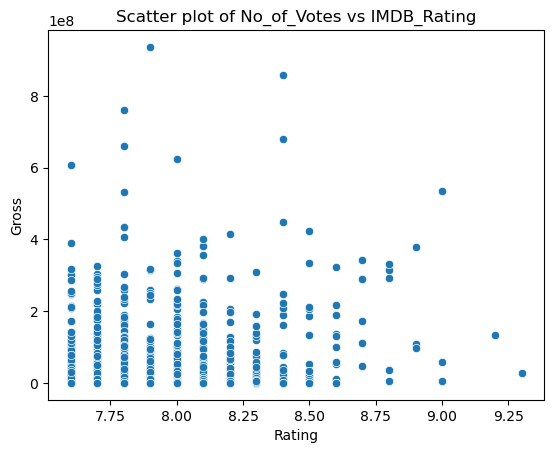

Correlation between Gross and IMDB_Rating: 0.08


In [98]:
'''
The Shawshank Redemption has over 2.5M votes and got the highest imdb_score of the dataset
That's why he had contributed more than others
Let's see if high rated films has greater gross
'''

sns.scatterplot(x='IMDB_Rating', y='Gross', data=df)

plt.title('Scatter plot of No_of_Votes vs IMDB_Rating')
plt.xlabel('Rating')
plt.ylabel('Gross')
plt.show()

correlation = df[['Gross', 'IMDB_Rating']].corr().iloc[0, 1]
print(f"Correlation between Gross and IMDB_Rating: {correlation:.2f}")

In [105]:
'''
Well, that's intresting. Let's see if there's any typo rounding erro on this... 
Usually a high rating film, especially if it's old, has a greater revenue
Let's see Q3 from IMDB_Rating and compare their gross
'''

# First, determine the value for Q3 for IMDB_Rating
q3_value = df['IMDB_Rating'].quantile(0.75)
low_gross = df['Gross'].quantile(0.25)

# Filter the dataframe for movies with IMDB_Rating in Q3
high_rated_movies = df[(df['IMDB_Rating'] >= q3_value) & (df['Gross'] <=low_gross)]

# Retrieve the Gross values for these movies
high_rated_movies.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,z_votes,z_rating,influence
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,0.0,-0.667135,2.361963,-1.575749
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",0,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,0.0,-0.668040,2.361963,-1.577885
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,Not Rated,133 min,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,0.0,-0.707722,2.361963,-1.671613
31,https://m.media-amazon.com/images/M/MV5BOWE4ZD...,Shichinin no samurai,1954,U,207 min,"Action, Adventure, Drama",8.6,A poor village under attack by bandits recruit...,98,Akira Kurosawa,Toshirô Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki,315744,269061.0,0.128450,2.361963,0.303395
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,0.0,0.403540,2.361963,0.953147


In [109]:
'''
As I imagined, some gross info is missing. Therefore, it's correlation may be effected.
Let's see how many rows has 0 gross on it
'''

df[df['Gross'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 18 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    169 non-null    object 
 1   Series_Title   169 non-null    object 
 2   Released_Year  169 non-null    object 
 3   Certificate    169 non-null    object 
 4   Runtime        169 non-null    object 
 5   Genre          169 non-null    object 
 6   IMDB_Rating    169 non-null    float64
 7   Overview       169 non-null    object 
 8   Meta_score     169 non-null    int32  
 9   Director       169 non-null    object 
 10  Star1          169 non-null    object 
 11  Star2          169 non-null    object 
 12  Star3          169 non-null    object 
 13  Star4          169 non-null    object 
 14  No_of_Votes    169 non-null    int64  
 15  Gross          169 non-null    float64
 16  z_votes        169 non-null    float64
 17  z_rating       169 non-null    float64
 18  influence